In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Put in the path of the file and column names
path = r'C:\Users\Admin\Desktop\Model_Result.csv'
score_name = 'Score'
target_name = 'G_B'
deal_num = 'dealno'

# Function Definition. Don't Change!
def roc_calc(path,score_name,target_name,deal_num):
    df = pd.read_csv(path)
    df = df[df[target_name]!='INDET']
    piv = df.pivot_table(deal_num,index=score_name,columns=target_name,aggfunc=len)
    piv = piv.sort_index()
    piv = piv.fillna(0)
    piv['Bad%'] = (piv.BAD.cumsum(axis=0))/(piv.BAD.sum())
    piv['Good%'] = (piv.GOOD.cumsum(axis=0))/(piv.GOOD.sum())
    piv = piv.reset_index()
    roc = 0
    for i in range(len(piv)-1):
        roc += (piv['Good%'].iloc[i+1] - piv['Good%'].iloc[i]) * (piv['Bad%'].iloc[i+1] + piv['Bad%'].iloc[i])
    return roc*0.5

def roc_plot(path,score_name,target_name,deal_num):
    df = pd.read_csv(path)
    df = df[df[target_name]!='INDET']
    piv = df.pivot_table(deal_num,index=score_name,columns=target_name,aggfunc=len)
    piv = piv.sort_index()
    piv = piv.fillna(0)
    piv['Bad%'] = (piv.BAD.cumsum(axis=0))/(piv.BAD.sum())
    piv['Good%'] = (piv.GOOD.cumsum(axis=0))/(piv.GOOD.sum())
    piv = piv.reset_index()
    roc = 0
    for i in range(len(piv)-1):
        roc += (piv['Good%'].iloc[i+1] - piv['Good%'].iloc[i]) * (piv['Bad%'].iloc[i+1] + piv['Bad%'].iloc[i])
    roc *= 0.5
    fig = plt.figure(figsize=(6,6))
    plt.plot(piv['Good%'], piv['Bad%'], lw=2)
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.xlabel('$Goods$')
    plt.ylabel('$Bads$')
    plt.grid()
    plt.title('ROC curve, ROC = %.4f'%roc)
    return plt

In [3]:
roc_calc(path,score_name,target_name,deal_num)

0.7130681818181818

<module 'matplotlib.pyplot' from 'C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

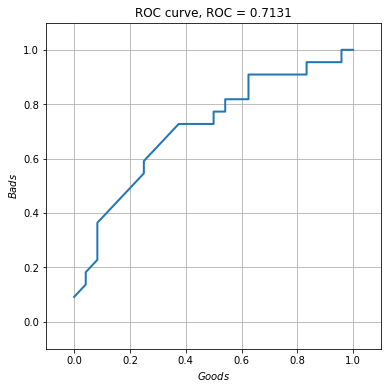

In [7]:
roc_plot(path,score_name,target_name,deal_num)